<br><br>
<font size='6'><b>Convolutional Neural Networks (CNN)
</b></font><br><br>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

Table of Contents
<div id="toc"></div>

# 1. Convolution

## 1.1. 1D Convolution

<br>
<center><img src="./image_files/1d_conv.png" width = 500></center>


## 1.2. Convolution on Image (= Convolution in 2D)

__Filter (or Kernel)__
- Modify or enhance an image by filtering
- Filter images to emphasize certain features or remove other features
- Filtering includes smoothing, sharpening and edge enhancement

- Discrete convolution can be viewed as element-wise multiplication by a matrix

<br>
<center><img src="./image_files/conv_animation.gif" width = 350></center>

<center><img src="./image_files/conv_lena.png" width = 800></center>



__How to find the right Kernels__


- We learn many different kernels that make specific effect on images

- Let’s apply an opposite approach

- We are not designing the kernel, but are learning the kernel from data

- Can learn feature extractor from data using a deep learning framework

# 2. Convolutional Neural Networks (CNN)


## 2.1. Motivation: Learning Visual Features

<br>
The bird occupies a local area and looks the same in different parts of an image. We should construct neural networks which exploit these properties.

<br><br>
<center><img src="./image_files/cnn_motivation.png" width = 800></center>

- ANN structure for object detecion in image

    - does not seem the best
    - did not make use of the fact that we are dealing with images
    - Spatial organization of the input is destroyed by flattening

<br>
<center><img src="./image_files/bird_ANN.png" width = 600></center>


<br>

- __Locality__: objects tend to have a local spatial support
    - fully and convolutionally connected layer $\rightarrow$ locally and convolutionally connected layer

<br>
<center><img src="./image_files/cnn_locality.png" width = 600></center>
<br>

- __Translation invariance__: object appearance is independent of location
    - Weight sharing: untis connected to different locations have the same weights
    - We are not designing the kernel, but are learning the kernel from data
    - _i.e._ We are learning visual feature extractor from data

<br>
<center><img src="./image_files/translation_invariance.png" width = 600></center>

## 2.2. Convolutional Operator

__Convolution of CNN__

- Local connectivity
- Weight sharing
- Typically have sparse interactions

- Convolutional Neural Networks
    - Simply neural networks that use the convolution in place of general matrix multiplication in at least one of their layers
   

- Multiple channels

<br>
<center><img src="./image_files/mult_channel_01.png" width = 400></center>


- Multiple kernels

<br>
<center><img src="./image_files/multi_kernels.png" width = 400></center>



## 2.3 Stride and Padding

- Strides: increment step size for the convolution operator
    - Reduces the size of the output map


- No stride and no padding

<br>
<center><img src="./image_files/no_padding_no_strides.gif" width = 300></center>

- Stride example with kernel size 3×3 and a stride of 2

<br>
<center><img src="./image_files/stride_example.gif" width = 300></center>


- Padding: artificially fill borders of image
    - Useful to keep spatial dimension constant across filters
    - Useful with strides and large receptive fields
    - Usually fill with 0s

<br>
<center><img src="./image_files/same_padding_no_strides.gif" width = 300></center>


## 2.4. Nonlinear Activation Function

<br>
<center><img src="./image_files/ReLU.png" width = 500></center>

## 2.5. Pooling
- Compute a maximum value in a sliding window (max pooling)
    - Reduce spatial resolution for faster computation
    - Achieve invariance to any permutation inside one of the cell

<br>
<center><img src="./image_files/pooling_invariance.png" width = 700></center>

- Pooling size : $2\times2$ for example


<center><img src="./image_files/Max_pooling_image.png" width = 500></center>


## 2.6. CNN for Classification 

- CONV and POOL layers output high-level features of input
- Fully connected layer uses these features for classifying input image
- Express output as probability of image belonging to a particular class


<br>
<center><img src="./image_files/cnn_clf.png" width = 900></center>
<br>

# 3. Lab: CNN with TensorFlow (MNIST)


- MNIST example 
- To classify handwritten digits

<br>
<center><img src="./image_files/CNN_arch.png" width = 900></center>
<br>

In [1]:
# 사용가능한 gpu의 list

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13511676516356693515
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 15297615154880319364
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 112001024
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 12355404435274113031
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 10469634240
locality {
  bus_id: 1
  links {
    link {
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 12202216817886106276
physical_device_desc: "device: 1, name: GeForce GTX 1080 Ti, pci bus id: 0000:04:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2"

## 3.1. Training

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

In [27]:
'''
Tensorflow의 Sequential, Conv2D를 이용하여 CNN classification 모델 만들기

CNN block structure

Conv2D(filter: 32) - MaxPooling2D - Conv2D(filter: 64) - MaxPooling2D - Flatten - Dense(128), Dense(10)

kernel size: (3,3), pooling size: (2,2)
activation : relu

hint 아래 참조

tf.keras.layers.Conv2D(filter, (kernel_h, kernel_w), activation = '', padding = '', input = (?, ?, ?))
tf.keras.layers.MaxPool2D((?,?))
'''

model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, 
                                   (3, 3),
                                   activation = 'relu',
                                   padding = 'SAME',
                                   input_shape = (28, 28, 1)),
            #tf.keras.layers.BatchNormalization(),
            #tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D((2,2)),
            
            tf.keras.layers.Conv2D(64, 
                                   (3, 3),
                                   activation = 'relu',
                                   padding = 'SAME',
                                   input_shape = (14, 14, 32)),
            
            tf.keras.layers.MaxPool2D((2,2)),
    
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dense(10, activation = 'softmax')
            ])

In [28]:
'''
<모델 compile>
Optimizer: Adam optimizer, 
Loss: sparse_categorical_crossentropy, 
metrics: accuracy
'''

model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [31]:
%%time

'''
CNN 모델 학습
epoch: 1
'''

model.fit(train_x, train_y, batch_size=1)

60000/60000 [==============================] - 195s 3ms/step - loss: 0.0846 - accuracy: 0.9753
CPU times: user 4min 36s, sys: 30.8 s, total: 5min 7s
Wall time: 3min 19s


In [32]:
test_loss, test_acc =model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0399 - accuracy: 0.9872


## 3.2. Testing or Evaluating

In [33]:
'''
Test data를 이용하여 모델 평가하기
'''
print('loss = {}, Accuracy = {} %'.format(round(test_loss,2), round(test_acc*100)))

loss = 0.04, Accuracy = 99 %


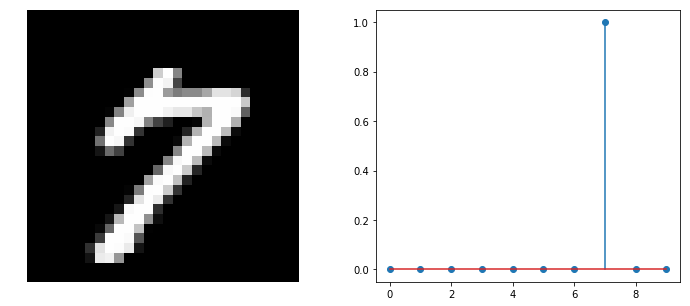

Prediction : 7


In [35]:
test_img = test_x[np.random.choice(test_x.shape[0], 1)]

predict = model.predict_on_batch(test_img)
mypred = np.argmax(predict, axis = 1)

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(mypred[0]))

# 4. Lab: CNN with Tensorflow (Steel Surface Defects)

- NEU steel surface defects example 
- To classify defects images into 6 classes

<br>
<center><img src="./image_files/NEU.jpg" width = 700></center>
<br>

Download [NEU steel surface defects](http://faculty.neu.edu.cn/yunhyan/NEU_surface_defect_database.html) images and labels 

- [NEU train images](https://www.dropbox.com/s/5fcdf9zfj95dztt/NEU_train_imgs.npy?dl=1)
- [NEU train labels](https://www.dropbox.com/s/0sy8nd8auwrt43m/NEU_train_labels.npy?dl=1)
- [NEU test images](https://www.dropbox.com/s/znjylp2hwnro2j6/NEU_test_imgs.npy?dl=1)
- [NEU test labels](https://www.dropbox.com/s/rm18trt9lr32bxb/NEU_test_labels.npy?dl=1)

## 4.1. Training

In [37]:
train_x, train_y = np.load('./data_files/NEU_train_imgs.npy'), np.load('./data_files/NEU_train_labels.npy')
test_x, test_y = np.load('./data_files/NEU_test_imgs.npy'), np.load('./data_files/NEU_test_labels.npy')

train_x, test_x = train_x/255.0, test_x/255.0
train_x = train_x.reshape((train_x.shape[0], 200, 200, 1))
test_x = test_x.reshape((test_x.shape[0], 200, 200, 1))

In [ ]:
'''
Tensorflow의 Sequential, Conv2D를 이용하여 CNN classification 모델 만들기

CNN block structure

Conv2D(filter: 32) - MaxPooling2D
Conv2D(filter: 64) - MaxPooling2D
Conv2D(filter: 128) - MaxPooling2D
Flatten - Dense(128), Dense(6)

kernel size: (3,3), pooling size: (2,2)
activation : relu

hint 아래 참조

tf.keras.layers.Conv2D(filter, (kernel_h, kernel_w), activation = '', padding = '', input = (?, ?, ?))
tf.keras.layers.MaxPool2D((?,?))
'''

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 
                           (3,3), 
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (200, 200, 1)),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(64, 
                           (3,3), 
                           activation = 'relu',
                           padding = 'SAME'),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(128, 
                           (3,3), 
                           activation = 'relu',
                           padding = 'SAME'),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(128, activation = 'relu'),    
    tf.keras.layers.Dense(6, activation = 'softmax')
])

In [41]:
'''
<모델 compile>
Optimizer: Adam optimizer, 
Loss: sparse_categorical_crossentropy, 
metrics: accuracy
'''
model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [42]:
'''
Conv2D layer와 Dense layer의 param # 확인
'''
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 80000)            

In [43]:
'''
CNN 모델 학습
epoch: 10
'''

model.fit(train_x, train_y, batch_size=1, epochs = 10)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.6391 - accuracy: 0.2873
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.3416 - accuracy: 0.4193
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1144 - accuracy: 0.5433
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9192 - accuracy: 0.6520
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6270 - accuracy: 0.7687
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4116 - accuracy: 0.8467
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2417 - accuracy: 0.9133
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2257 - accuracy: 0.9300
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1459 - accuracy: 0.9573
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.154

## 4.2. Testing or Evaluating

In [44]:
'''
Test data를 이용하여 모델 평가하기
'''

print('loss = {}, Accuracy = {} %'.format(round(test_loss,2), round(test_acc*100)))

loss = 0.04, Accuracy = 99 %


In [53]:
train_y

array([0, 0, 0, ..., 5, 5, 5])

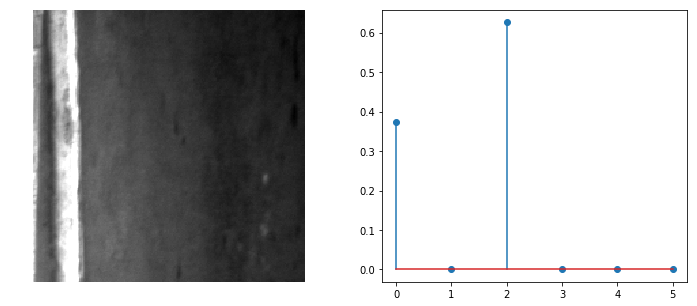

Prediction : pitted surface
Ground Truth : scratches


In [54]:
name = ['scratches', 'rolled-in scale', 'pitted surface', 'patches', 'inclusion', 'crazing']

idx = np.random.choice(test_x.shape[0], 1)
test_img = test_x[idx]
GT = test_y[idx]

predict = model.predict_on_batch(test_img)
mypred = np.argmax(predict, axis = 1)

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.imshow(test_img.reshape(200, 200), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(name[mypred[0]]))
print('Ground Truth : {}'.format(name[GT[0]]))

In [58]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>